# Исследование объявлений о продаже квартир

Мы располагаем данными сервиса Google-квартиры — итория объявлений о реализации квартир в Санкт-Петербурге и пригородах за несколько лет. Необходимо исследовать, какие факторы влияют на ценообразование. 

Описание данных

 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах(м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении

**Содержание**
- [Шаг 1. Общая информация](#Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию.)
- [Шаг 2. Предобработка данных](#Шаг-2.-Предобработка-данных)
 - [2.1. Обработка пропусков](#2.1-Обработка-пропусков)
 - [2.2. Замена типа данных](#2.2-Замена-типа-данных)
- [Шаг 3. Добавление столбцов](#Шаг-3.-Посчитайте-и-добавьте-в-таблицу)
- [Шаг 4. Исследовательский анализ данных](#Шаг-4.-Исследовательский-анализ-данных)
 - [4.1 Исследование площади, цены, числа комнат, высоты потолков](#4.1-Исследование-площади,-цены,-числа-комнат,-высоты-потолков)
 - [4.2 Исследование количества времени для продажи квартиры](#4.2-Исследование-количества-времени-для-продажи-квартиры)
 - [4.3 Редкие и выбивающиеся значения](#4.3-Редкие-и-выбивающиеся-значения)
 - [4.4 Исследование факторов, влияющих на стоимость квартиры](#4.4-Исследование-факторов,-влияющих-на-стоимость-квартиры)
 - [4.5 Анализ десяти населённых пунктов с наибольшим числом объявлений](#4.5-Анализ-десяти-населенных-пунктов-с-наибольшим-числом-объявлений)
 - [4.6 Анализ изменения цены по степени удалённости от центра](#4.6-Анализ-изменения-цены-по-степени-удалённости-от-центра)
 - [4.7 Сравнение выводов по квартирам в центре и общих выводов по всему городу](#4.7-Сравнение-выводов-по-квартирам-в-центре-и-общих-выводов-по-всему-городу) 
- [Шаг 5. Общий вывод](#Шаг-5.-Общий-вывод)

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В выборке есть достаточное количество пропущенных значений, не все из которых нам нужно заполнить.

### Шаг 2. Предобработка данных

### 2.1 Обработка пропусков

На этом шаге начнем исследовать значения столбцов, в которых есть пропущенные данные и могут быть потенциальные ошибки.

Столбец 'total_images' - предельно простой описательный признак, количество фотографий в объявлении может быть любым. Метод describe() показал, что каких-то сликом выбивающихся значений нет. 50 фотографий в теории можно прикрепить к объявлению.

Столбец 'last_price' также выглядит нормальным - три четверти выборки расположилось до цены квартиры 6.8 млн руб. Максимальные 763 млн руб. также выглядят допустимой величиной, нулевых значений в столбце нет. 

Столбец 'total_area' - все значения ненулевые, средние и медиана выглядят разумными величинами.

Столбец 'first_day_exposition' - значения ненулевые, переформатируем эти значения.



In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Столбец 'rooms' - минимальное значение ноль. Проанализируем отмечены ли так студии, или это пропуски

In [6]:
print('Количество студий:',len(data.query('studio == True')))
print('Количество студий с нулем комнат:',len(data.query('rooms == 0 and studio == True')))
print('Количество квартир с нулем комнат не студий:',len(data.query('rooms == 0 and studio == False')))
print('Количество студий с одной комнатой:', len(data.query('rooms == 1 and studio == True')))
print('Количество студий с более чем одной комнатой:',len(data.query('rooms > 1 and studio == True')))

Количество студий: 149
Количество студий с нулем комнат: 138
Количество квартир с нулем комнат не студий: 59
Количество студий с одной комнатой: 11
Количество студий с более чем одной комнатой: 0


Исходя из данных выше, у большинства студий в выборке стоит число комнат 0.

В то же время у 11 студий число комнат указано как 1.

Также есть 59 квартир с нулем комнат, которые не являются студиями.

На мой взгляд, нужно привести к единообразию сочетание признаков 'studio' == True и 'rooms' == 0.

В дальнейшем, это нам поможет устанавливать связь между ценой и количеством комнат.

Итак, сейчас стоит сделать 2 вещи. Первая - поменять у 11 квартир значения 'rooms' с 1 на 0.

Второе - проверить, являются ли квартиры с нулем комнат студиями, рассмотрев среднюю площадь студий и средние цены.

In [7]:
# напишем функцию для строки - если квартира-студия и число комнат = 1,
# то меняем на 0, в противном случае оставляем как есть
def one_to_zero_for_studio(row):
    studio = row['studio']
    room = row['rooms']
    
    if studio == True and room == 1:
        room = 0
        return room
    else:
        return room

In [8]:
data['rooms'] = data.apply(one_to_zero_for_studio, axis=1)

In [9]:
print('Количество студий:',len(data.query('studio == True')))
print('Количество студий с нулем комнат:',len(data.query('rooms == 0 and studio == True')))
print('Количество квартир с нулем комнат не студий:',len(data.query('rooms == 0 and studio == False')))
print('Количество студий с одной комнатой:', len(data.query('rooms == 1 and studio == True')))
print('Количество студий с более чем одной комнатой:',len(data.query('rooms > 1 and studio == True')))

Количество студий: 149
Количество студий с нулем комнат: 149
Количество квартир с нулем комнат не студий: 59
Количество студий с одной комнатой: 0
Количество студий с более чем одной комнатой: 0


In [10]:
data['rooms'].value_counts()

1     8036
2     7940
3     5814
4     1180
5      326
0      208
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [11]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Далее взглянем на квартиры с нулем комнат. Выделим их в отдельный датафрейм.


In [12]:
zero_rooms = data.query('rooms == 0 and studio == False')
zero_rooms.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,59.000000,5.900000e+01,59.000000,59.0,10.00000,59.000000,55.000000,59.000000,0.0,46.000000,31.000000,31.000000,31.000000,9.000000,31.000000,21.000000,59.000000
mean,7.423729,3.911034e+06,32.707288,0.0,5.26200,17.559322,18.585455,9.610169,NaN,1.586957,25054.354839,13577.870968,0.387097,665.111111,0.935484,517.619048,77.474576
std,5.531114,8.910509e+06,44.986261,0.0,7.64236,6.891452,3.464552,6.843111,NaN,0.617381,13276.323677,5014.710166,0.667204,242.505899,0.892020,283.847754,103.924103
min,0.000000,1.315000e+06,16.000000,0.0,2.70000,4.000000,10.500000,1.000000,NaN,0.000000,10031.000000,2111.000000,0.000000,228.000000,0.000000,72.000000,3.000000
25%,3.500000,2.310000e+06,25.000000,0.0,2.71250,12.000000,17.000000,4.000000,NaN,1.000000,15606.000000,11904.500000,0.000000,518.000000,0.000000,232.000000,18.500000
50%,7.000000,2.600000e+06,26.100000,0.0,2.80000,18.000000,18.000000,8.000000,NaN,2.000000,20735.000000,13222.000000,0.000000,733.000000,1.000000,584.000000,45.000000
75%,10.000000,3.277500e+06,28.250000,0.0,2.80000,24.000000,20.000000,13.500000,NaN,2.000000,32726.000000,16814.000000,1.000000,761.000000,1.000000,767.000000,81.500000
max,21.000000,7.100000e+07,371.000000,0.0,27.00000,35.000000,25.700000,26.000000,NaN,2.000000,53791.000000,23810.000000,2.000000,1021.000000,3.000000,936.000000,483.000000


Видим, что присутствует квартира с площадью 371 кв. м. Взглянем на нее.

In [13]:
data.query('rooms == 0 and studio == False and total_area > 300')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0


Это какое-то дорогое помещение, также мы не знаем ни жилую площадь, ни количество балконов.
Проверим другие квартиры из этого дома, попробуем их отобрать по расстоянию до аэропорта


In [14]:
data.query('airports_nearest == 25257')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13530,8,12000000.0,107.4,2017-11-12,3,NaN,6.0,71.3,4,NaN,...,8.8,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,34.0
17350,18,25000000.0,134.0,2016-12-01,7,3.29,6.0,104.0,2,NaN,...,11.2,0.0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,278.0
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0


Итак, по всей видимости, это какой-то дорогой дом, есть еще 2 объекта с высокой ценой. 

Поскольку мы никак иначе не можем предположить, студия это или нет, оставим ее за пределами нашего отдельного датафрейма по квартирам с нулем комнат.

Возможно, от этой строки в будущем придется избавится.

In [15]:
zero_rooms = data.query('rooms == 0 and studio == False and total_area < 300')
zero_rooms.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,58.000000,5.800000e+01,58.000000,58.0,9.000000,58.000000,55.000000,58.000000,0.0,46.000000,30.00000,30.000000,30.000000,8.000000,30.000000,20.000000,58.000000
mean,7.465517,2.754328e+06,26.874655,0.0,5.450000,17.741379,18.585455,9.672414,NaN,1.586957,25047.60000,13828.466667,0.366667,653.125000,0.933333,514.300000,77.258621
std,5.570018,6.818936e+05,4.110738,0.0,8.081383,6.807015,3.464552,6.886009,NaN,0.617381,13503.23164,4899.040059,0.668675,256.383885,0.907187,290.803261,104.818399
min,0.000000,1.315000e+06,16.000000,0.0,2.700000,4.000000,10.500000,1.000000,NaN,0.000000,10031.00000,2111.000000,0.000000,228.000000,0.000000,72.000000,3.000000
25%,3.250000,2.305000e+06,25.000000,0.0,2.700000,12.000000,17.000000,4.000000,NaN,1.000000,15556.00000,12099.750000,0.000000,504.000000,0.000000,226.500000,17.750000
50%,7.000000,2.600000e+06,26.100000,0.0,2.800000,18.000000,18.000000,8.000000,NaN,2.000000,20558.00000,13276.000000,0.000000,662.500000,1.000000,581.500000,45.000000
75%,10.000000,3.241250e+06,28.162500,0.0,2.800000,24.000000,20.000000,13.750000,NaN,2.000000,33071.00000,16827.000000,0.750000,795.750000,1.000000,775.750000,79.250000
max,21.000000,5.200000e+06,42.630000,0.0,27.000000,35.000000,25.700000,26.000000,NaN,2.000000,53791.00000,23810.000000,2.000000,1021.000000,3.000000,936.000000,483.000000


Сравним описательную статистику квартир с нулевыми комнатами с данными студий и однушек по выборке.

In [16]:
print('Средняя цена студий:',data.query('studio == True')['last_price'].mean())
print('Средняя площадь студий:',data.query('studio == True')['total_area'].mean())
print('Средняя площадь однокомнатных:',data.query('rooms == 1')['total_area'].mean())

Средняя цена студий: 3070333.22147651
Средняя площадь студий: 27.78315436241611
Средняя площадь однокомнатных: 37.65870333499253


Итак, средняя цена студий по выборке - 3.07 млн рублей против 2.75 млн руб. по квартирам с нулевыми комнатами.

Средние площади отличаются на 1 кв. м.

Исходя из этого, можно предположить, что квартиры у которых 'studio == False' и 'rooms == 0' - на самом деле студии, но по ним ошибочно не был поставлен маркер "студия". 

In [17]:
# Напишем функцию для строки - если комнат 0 и площадь меньше 300 (чтобы исключить единственный случай с квартирой 371 кв.м)
# функция поменяет значение в столбце 'studio' на True
def error_in_studios(row):
    studio = row['studio']
    room = row['rooms']
    area = row['total_area']
    
    if room == 0 and area < 300:
        studio = True
        return studio
    else:
        return studio

In [18]:
data['studio'] = data.apply(error_in_studios, axis=1)

Проверим то, как мы обработали студии и квартиры с нулем комнат.

In [19]:
print('Количество студий:',len(data.query('studio == True')))
print('Количество студий с нулем комнат:',len(data.query('rooms == 0 and studio == True')))
print('Количество квартир с нулем комнат не студий:',len(data.query('rooms == 0 and studio == False')))
print('Количество студий с одной комнатой:', len(data.query('rooms == 1 and studio == True')))
print('Количество студий с более чем одной комнатой:',len(data.query('rooms > 1 and studio == True')))

Количество студий: 207
Количество студий с нулем комнат: 207
Количество квартир с нулем комнат не студий: 1
Количество студий с одной комнатой: 0
Количество студий с более чем одной комнатой: 0


Итак, студий у нас стало 207, нет студий с количеством комнат == 1, осталась единственная квартира с нулем комнат, которую мы в будущем, возможно удалим. 

Возможно, описанные здесь шаги избыточны для такого малого количества строк, тем не менее, после этих манипуляций получилась вроде бы стройная категория квартир-студий, которая составила почти 1% от выборки.


Идем дальше.

In [20]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070172,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.079081,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Следующий параметр 'ceiling_height' - высота потолков. Есть существенные пропуски. Также видим странные значений вроде квартиры с высотой потолка 100 метров. Их, наверное, следует потом исключить.

Попробуем заполнить пропуски высоты потолков следующим образом.

Предположим, что 4 параметра - 'airports_nearest', 'cityCenters_nearest','ponds_neares', 'parks_nearest'однозначно определяют уникальность дома.

Значит, если мы сделаем группировку по этим 4 параметрам, то каждая группа будет представлять собой отдельный дом.

У каждого дома может быть в продаже несколько квартир, значит, если высота потолков пропущена у одного, то ее можно заполнить первым значением по возрастанию, которое встречается в этой группе. Можно взять медиану, но если допустить, что люди ошибались в сторону увеличения, то это исказит картину. 

In [21]:
data['ceiling_height'] = (
    data.sort_values('ceiling_height', ascending=True)['ceiling_height']
    .fillna(data.groupby(['airports_nearest', 'cityCenters_nearest', 'ponds_nearest', 'parks_nearest'])
    ['ceiling_height'].transform('first'))
)

In [22]:
data['ceiling_height'].describe()

count    15340.000000
mean         2.772325
std          1.227806
min          1.000000
25%          2.530000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Итак, после того, как мы сгруппировали дома, и заполнили первым значением, количество ненулевых значений в столбце 'ceiling_height' выросло с 14504 до 15340.

Статистика признака изменилась несильно. Медиана не изменилась.

Идем дальше. Столбец 'floors_total' имеет пропуски.

Сперва проверим столбец на предмет ошибки превышения этажа квартиры над общим количеством этажей.

In [23]:
data.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Пустой датафрейм на выходе, значит, таких ошибок нет.

Заполним пропуски их так же, сгруппировав все квартиры по 4 признакам и получив отдельные дома. Будем заполнять последним значением.

In [24]:
data['floors_total'] = (
    data.sort_values('floors_total', ascending=True)['floors_total']
    .fillna(data.groupby(['airports_nearest', 'cityCenters_nearest','ponds_nearest', 'parks_nearest'])
    ['floors_total'].transform('last'))
)

In [25]:
data['floors_total'].describe()

count    23636.000000
mean        10.675283
std          6.598430
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Добавилось 23 значения. Проверим корректность заполнения, сделаем срез по квартирам, у которых этаж
выше общего числа этажей в доме.

In [26]:
data.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5146,10,3085024.0,33.33,2018-10-06,1,NaN,5.0,11.00,12,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140.0
6136,10,5467707.0,58.13,2018-11-04,3,2.75,5.0,31.00,6,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,110.0
6288,10,3094680.0,34.85,2018-10-01,1,NaN,5.0,11.00,8,NaN,...,NaN,NaN,Санкт-Петербург,47204.0,25767.0,1.0,297.0,1.0,465.0,145.0
8478,19,13500000.0,77.80,2019-04-17,2,2.80,11.0,39.41,21,NaN,...,13.27,2.0,Санкт-Петербург,12838.0,11477.0,1.0,593.0,1.0,130.0,NaN
10319,10,3216089.0,35.79,2018-10-01,1,2.75,5.0,10.00,8,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0
11129,10,3128418.0,34.53,2018-10-01,1,NaN,5.0,11.00,13,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,145.0
11328,10,5386325.0,58.13,2018-10-10,3,NaN,5.0,31.00,9,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,135.0
12104,10,3182400.0,35.36,2018-10-01,1,2.75,5.0,10.00,7,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0
17925,10,3241540.0,32.69,2018-10-01,1,2.75,5.0,11.00,9,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0
19133,10,2903659.0,24.67,2018-10-10,1,NaN,5.0,16.00,6,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,136.0


Таких квартир получилось 11. И это произошло, вследствие замены пропусков.

Такая ситуация возникла, видимо, из-за того, что в этих домах есть подъезды с разной этажностью. И в объявлениях была указана этажность квартир самого низкого подъезда.

Тогда для таких квартир мы исправим ошибку следующим образом.

Выдвинем следующую гипотезу.

Возможно, люди просто не знают, сколько у них этажей в подъезде.

Предположим, что если бы они жили на последнем этаже, то точно бы знали, что над ними только крыша.

Значит, наши 11 квартир - находятся не на последнем этаже.

В дальнейшем для нас может быть важно, на каком этаже находится квартира - первый, последний и не последний. Поэтому здесь просто заменим ошибочные значения общего числа этажей на этаж квартиры + 1.

In [27]:
data.loc[data['floor'] > data['floors_total'], 'floors_total'] = data['floor'] + 1

In [28]:
data.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Ошибок больше нет.

Перейдем к анализу жилой площади и площади кухни.

Также добавим столбцы соотношения жилой и общей площади и площади кухни к общей площади.

In [29]:
data['living_to_total_area'] = data['living_area'] / data['total_area']
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']

Здесь сразу же попробуем заполнить пропуски в жилой площади и площади кухни средними коэффициентами отношения жилой площади и кухни к общей площади по группам "комнатности", умноженным на общую площадь.

Затем добавим столбец-маркер для того, чтобы сравнить, нет ли ошибок в заполнении площадей. В нем сложим жилую площадь и площадь кухни. Назовем его 'check_area'.


In [30]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_to_total_area'].transform('median') * data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_to_total_area'].transform('median') * data['total_area'])
data['check_area'] = data['living_area'] + data['kitchen_area']

Проверим, есть ли в выборке квартиры с 'check_area' больше, чем общая площадь.

In [31]:
data.query('check_area >= total_area')[['total_area','living_area','kitchen_area']]

,total_area,living_area,kitchen_area
184,30.20,26.10,6.20000
220,37.00,28.00,9.00000
424,98.00,88.00,12.60000
545,23.80,20.00,5.00000
551,31.59,30.55,9.28000
...,...,...,...
22963,102.00,78.00,24.00000
23191,18.90,16.00,4.68415
23202,67.92,63.00,13.04000
23297,48.20,42.20,6.00000


Получилось 188 квартир с некорректной контрольной суммой жилой и кухонной площади.

Из данных видно, что ошибки происходили по разным причинам - люди указывали одинаковую жилую и общую площадь, или включали в жилую площадь площадь кухни. Также возможно были ошибки из-за того, что люди указывали общую площадь из документов, площадь кухни, а жилую площадь находили через разность.

Можно скорректировать эти данные, умножив общую площадь таких квартир на медианную долю жилой и кухонной площади.

Гипотеза состоит в том, что люди не ошибались при указании общей площади, так как это число первым встречается в документах.

In [32]:
data.loc[data['check_area'] >= data['total_area'], 'living_area'] = data['total_area'] * data['living_to_total_area'].median()
data.loc[data['check_area'] >= data['total_area'], 'kitchen_area'] = data['total_area'] * data['kitchen_to_total_area'].median()

Пересчитываем столбец check_area и столбцы с долями, проверяем снова.

In [33]:
data['check_area'] = data['living_area'] + data['kitchen_area']
data['living_to_total_area'] = data['living_area'] / data['total_area']
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']
data.query('check_area >= total_area')[['total_area','living_area','kitchen_area', 'check_area', 'living_to_total_area','kitchen_to_total_area' ]]

,total_area,living_area,kitchen_area,check_area,living_to_total_area,kitchen_to_total_area


На выходе пустой датафрейм, значит ошибки устранены. Избавимся от столбца 'check_area'


In [34]:
data = data.drop(columns=['check_area'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images             23699 non-null int64
last_price               23699 non-null float64
total_area               23699 non-null float64
first_day_exposition     23699 non-null datetime64[ns]
rooms                    23699 non-null int64
ceiling_height           15340 non-null float64
floors_total             23636 non-null float64
living_area              23699 non-null float64
floor                    23699 non-null int64
is_apartment             2775 non-null object
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             23491 non-null float64
balcony                  12180 non-null float64
locality_name            23650 non-null object
airports_nearest         18157 non-null float64
cityCenters_nearest      18180 non-null float64
parks_around3000         18181 non-null float64
parks_nearest            8079 non-n

Идем дальше. Столбец 'floor'.

In [36]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Нет нулевых значений, минимальное - 1, среднее - 6, медиана - 4. Выглядит в целом правдоподобно.

Затем проанализируем столбец 'is_apartment'.

In [37]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Попробуем заполнить часть пропусков группировкой по 4 параметрам - первым (и единственным) значением в группе.

In [38]:
data['is_apartment'] = (
    data.sort_values('is_apartment', ascending=True)['is_apartment']
    .fillna(data.groupby(['airports_nearest', 'cityCenters_nearest','ponds_nearest', 'parks_nearest'])
    ['is_apartment'].transform('first'))
)

In [39]:
data['is_apartment'].value_counts()

False    3427
True       57
Name: is_apartment, dtype: int64

Итак, число апартаментов выросло на 7, существенно увеличилось число "неапартаментов".

Со столбцом 'studio' разобрались ранее.

In [40]:
data['studio'].value_counts()

False    23492
True       207
Name: studio, dtype: int64

Столбец 'open_plan' - пропусков нет.

Столбец 'kitchen_area' - обработали ранее, пропуски - это пустые значения для студий.

Столбец 'balcony' - предположим, что пропуск означает отсутствие балкона. Заполним пропуски нулями

In [41]:
data['balcony'] = data['balcony'].fillna(0)

Столбец с названием населенного пункта имеет порядка 50 пропусков.

Применим группировку по 4 параметрам и попробуем заполнить часть пропусков.



In [42]:
data['locality_name'] = (
    data.sort_values('locality_name', ascending=True)['locality_name']
    .fillna(data.groupby(['airports_nearest', 'cityCenters_nearest','ponds_nearest', 'parks_nearest'])
    ['locality_name'].transform('first'))
)

In [43]:
data['locality_name'].describe()

count               23653
unique                364
top       Санкт-Петербург
freq                15724
Name: locality_name, dtype: object

In [44]:
data['locality_name'].value_counts()

Санкт-Петербург                               15724
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
посёлок при железнодорожной станции Вещево        1
посёлок Дзержинского                              1
поселок Цвылёво                                   1
поселок Володарское                               1
деревня Мануйлово                                 1
Name: locality_name, Length: 364, dtype: int64

Заполнили 3 пропуска.

Также обратим внимание, есть ли единообразие в заполнении названий на предмет буквы "ё".
Отобразим значения для "поселок Мурино"

In [45]:
data[data['locality_name']== 'поселок Мурино']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area
66,6,3450000.0,34.00,2015-12-16,1,2.60,17.0,17.400000,8,False,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.0,0.511765,0.338235
1467,1,4148000.0,66.91,2016-06-27,2,2.60,14.0,36.270000,1,False,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,58.0,0.542071,0.167987
2026,9,2310000.0,33.69,2016-04-15,1,2.63,27.0,15.320000,26,False,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.454734,0.278718
2408,0,3200000.0,40.00,2016-06-09,1,2.70,17.0,15.700000,17,False,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,33.0,0.392500,0.292500
4777,0,2700000.0,28.20,2016-04-25,1,NaN,21.0,16.013649,11,NaN,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,68.0,0.567860,0.172414
4860,10,3350000.0,32.00,2016-05-30,1,NaN,27.0,16.000000,24,False,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,89.0,0.500000,0.259375
4960,12,3300000.0,32.10,2016-04-04,1,2.75,20.0,15.200000,7,False,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,84.0,0.473520,0.264798
5354,5,3750000.0,55.00,2016-01-23,2,NaN,18.0,27.890000,8,NaN,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,145.0,0.507091,0.206182
6033,4,5600000.0,82.00,2015-09-03,3,NaN,24.0,51.796667,16,NaN,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,311.0,0.631667,0.128571
6926,12,3100000.0,35.58,2015-11-23,1,NaN,20.0,14.030000,17,NaN,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,209.0,0.394323,0.266442


Как видно, есть случаи, когда посёлок написан через е. Чтобы устранить это, заменим букву "ё" во всем столбце на "е"

In [46]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [47]:
data[data['locality_name']== 'посёлок Мурино']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area


Буквы "ё" убраны.

Обратимся к одному из параметров, полученных автоматически на основе картографических данных.
Это 'airports_nearest', 'cityCenters_nearest', 'ponds_nearest', 'parks_nearest', 'ponds_around3000', 'parks_around_3000'.

In [48]:
data[data['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400000,5,NaN,...,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.473684,0.299342
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.430000,26,NaN,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.465320,0.265682
12,10,3890000.0,54.00,2016-06-30,2,NaN,5.0,30.000000,5,NaN,...,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.555556,0.166667
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.000000,15,NaN,...,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,0.517241,0.189655
30,12,2200000.0,32.80,2018-02-19,1,NaN,9.0,15.821176,2,NaN,...,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,0.482353,0.247839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.500000,3,NaN,...,поселок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.724522,0.087580
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5.0,17.500000,4,NaN,...,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,0.583333,0.200000
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000000,4,NaN,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,NaN,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523810,0.161075


Видно, что пропуски характерны в большей степени для определенных населенных пунктов в Ленинградской области.
Заполнить их адекватными значениям вроде бы не представляется возможным, так как, в частности, отсутствует полный блок картографических данных.

In [49]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,41.886654,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.585009,0.263966
44,13,5350000.0,40.00,2018-11-18,1,2.76,22.0,19.294118,3,NaN,...,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,0.482353,0.247839
45,17,5200000.0,50.60,2018-12-02,2,2.65,9.0,30.300000,7,NaN,...,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,0.598814,0.138340
46,17,6600000.0,52.10,2019-01-31,2,2.60,24.0,29.700000,9,NaN,...,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,0.570058,0.159309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.400000,17,NaN,...,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN,0.492414,0.107586
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.300000,5,NaN,...,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN,0.558065,0.180645
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,NaN,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,0.547792,0.103356
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,NaN,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523810,0.161075


Пропуски в столбце со сроком размещения объявления также заполнять не будем. В частности, они могут значить то, что объявление до сих пор размещено и квартира не продалась. 

### 2.2 Замена типа данных

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images             23699 non-null int64
last_price               23699 non-null float64
total_area               23699 non-null float64
first_day_exposition     23699 non-null datetime64[ns]
rooms                    23699 non-null int64
ceiling_height           15340 non-null float64
floors_total             23636 non-null float64
living_area              23699 non-null float64
floor                    23699 non-null int64
is_apartment             3484 non-null object
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             23491 non-null float64
balcony                  23699 non-null float64
locality_name            23653 non-null object
airports_nearest         18157 non-null float64
cityCenters_nearest      18180 non-null float64
parks_around3000         18181 non-null float64
parks_nearest            8079 non-n

Также здесь разделим значения столбца 'last_price' на 1000, чтобы убрать разрядность и получить цены квартир в тыс. рублей.

In [51]:
data['last_price'] = data['last_price'] / 1000

Поменяем значения в столбцах где не нужна точность до знаков после запятой на целочисленные значения.

In [52]:
data[['floors_total', 'airports_nearest', 'cityCenters_nearest', 'ponds_nearest', 
      'parks_nearest', 'ponds_around3000', 'parks_around3000']] = data[['floors_total', 'airports_nearest', 'cityCenters_nearest', 'ponds_nearest', 
      'parks_nearest', 'ponds_around3000', 'parks_around3000']].astype('Int64')


data[['last_price', 'balcony']] = data[['last_price', 'balcony']].astype(int)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images             23699 non-null int64
last_price               23699 non-null int64
total_area               23699 non-null float64
first_day_exposition     23699 non-null datetime64[ns]
rooms                    23699 non-null int64
ceiling_height           15340 non-null float64
floors_total             23636 non-null Int64
living_area              23699 non-null float64
floor                    23699 non-null int64
is_apartment             3484 non-null object
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             23491 non-null float64
balcony                  23699 non-null int64
locality_name            23653 non-null object
airports_nearest         18157 non-null Int64
cityCenters_nearest      18180 non-null Int64
parks_around3000         18181 non-null Int64
parks_nearest            8079 non-null Int64
po

In [54]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area
0,20,13000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,Санкт-Петербург,18863,16028,1,482,2,755,NaN,0.472222,0.231481
1,7,3350,40.40,2018-12-04,1,NaN,11,18.600000,1,NaN,...,поселок Шушары,12817,18603,0,NaN,0,NaN,81.0,0.460396,0.272277
2,10,5196,56.00,2015-08-20,2,NaN,5,34.300000,4,NaN,...,Санкт-Петербург,21741,13933,1,90,2,574,558.0,0.612500,0.148214
3,0,64900,159.00,2015-07-24,3,3.00,14,100.435000,9,NaN,...,Санкт-Петербург,28098,6800,2,84,3,234,424.0,0.631667,0.128571
4,2,10000,100.00,2018-06-19,2,3.03,14,32.000000,13,NaN,...,Санкт-Петербург,31856,8098,2,112,1,48,121.0,0.320000,0.410000
5,10,2890,30.40,2018-09-10,1,NaN,12,14.400000,5,NaN,...,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.473684,0.299342
6,6,3700,37.30,2017-11-02,1,NaN,26,10.600000,6,NaN,...,поселок Парголово,52996,19143,0,NaN,0,NaN,155.0,0.284182,0.386059
7,5,7915,71.60,2019-04-18,2,NaN,24,41.886654,22,NaN,...,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN,0.585009,0.263966
8,20,2900,33.16,2018-05-23,1,NaN,27,15.430000,26,NaN,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.465320,0.265682
9,18,5400,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,...,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289.0,0.714754,0.106557


### Выводы

Итак, мы заполнили часть пропусков. Основным инструментом заполнения для нас служила группировка по 4 признакам - расстояние до аэропорта, центра, парка и пруда. Это делалось в рамках гипотезы о том, что эти 4 признака могут однозначно идентифицировать конкретный дом. И на основании непропущенных значений из этого дома можно будет заполнить часть пропусков.

Были заполнены пропуски в жилой и кухонной площади через среднее отношение жилой и кухонной площади у общей площади по группам по числу комнат.

Также не заполнялись пропуски в автоматически полученных картографических данных, так как они характерны, преимущественно, для населенных пунктов из Ленинградской области.

Также в столбце про населенный пункт заменили буквы ё на е, чтобы однозначно идентифицировать названия поселков. 

Кроме того, была проделана работа по выделению студий в отдельную категорию, где в столбце 'studio' стоит True, а в столбце 'rooms' стоит 0.

Отформатировали столбец 'first_day_expansion' для удобной даты.
Сразу добавили столбцы соотношения жилой и кухонной площади к общей площади квартиры.

Поменяли также типы данных на целые числа там, где не нужна точность до знаков после запятой.
Поменяли на булев тип в столбце про апартаменты.


### Шаг 3. Посчитайте и добавьте в таблицу

Итак, на этом этапе дополним таблицу столбцами.

Добавим цену за квадратный метр - разделим цену квартиры на общую площадь.

Сразу зададим целочисленный формат.

In [55]:
data['price_for_m'] = (data['last_price'] / data['total_area'] * 1000).astype(int)

Получим столбцы с днем недели, месяцем и годом.

In [56]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Далее необходим добавить столбец с категорией этажа квартиры.

Для этого напишем фукцию и применим ее к строкам.

In [57]:
# функция получает строку
# проверяем равен ли этаж квартиры общему количеству этажей в доме
# если да - то этаж последний, если этаж == 1, то первый
# иначе - другой
def floor_category(row):
    total = row['floors_total']
    floor = row['floor']
    
    if floor == total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

In [58]:
data['floor_category'] = data.apply(floor_category, axis=1)

In [59]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year,floor_category
0,20,13000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755,NaN,0.472222,0.231481,120370,3,3,2019,другой
1,7,3350,40.40,2018-12-04,1,NaN,11,18.600000,1,NaN,...,0,NaN,81.0,0.460396,0.272277,82920,1,12,2018,первый
2,10,5196,56.00,2015-08-20,2,NaN,5,34.300000,4,NaN,...,2,574,558.0,0.612500,0.148214,92785,3,8,2015,другой
3,0,64900,159.00,2015-07-24,3,3.00,14,100.435000,9,NaN,...,3,234,424.0,0.631667,0.128571,408176,4,7,2015,другой
4,2,10000,100.00,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1,48,121.0,0.320000,0.410000,100000,1,6,2018,другой
5,10,2890,30.40,2018-09-10,1,NaN,12,14.400000,5,NaN,...,NaN,NaN,55.0,0.473684,0.299342,95065,0,9,2018,другой
6,6,3700,37.30,2017-11-02,1,NaN,26,10.600000,6,NaN,...,0,NaN,155.0,0.284182,0.386059,99195,3,11,2017,другой
7,5,7915,71.60,2019-04-18,2,NaN,24,41.886654,22,NaN,...,0,NaN,NaN,0.585009,0.263966,110544,3,4,2019,другой
8,20,2900,33.16,2018-05-23,1,NaN,27,15.430000,26,NaN,...,NaN,NaN,189.0,0.465320,0.265682,87454,2,5,2018,другой
9,18,5400,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,...,0,NaN,289.0,0.714754,0.106557,88524,6,2,2017,другой


Итак, необходимые данные добавлены.

Тип данных для цены за кв. метр выбран целочисленный, так как копейками было решено пренебречь.

### Шаг 4. Исследовательский анализ данных

###  4.1 Исследование площади, цены, числа комнат, высоты потолков

Итак, на этом этапе приступим к изучению параметров квартир. Вызовем метод describe для интересующих нас столбцов.

In [60]:
data[['total_area', 'last_price','price_for_m', 'rooms','ceiling_height']].describe()

,total_area,last_price,price_for_m,rooms,ceiling_height
count,23699.000000,23699.000000,2.369900e+04,23699.000000,15340.000000
mean,60.348651,6541.532723,9.942094e+04,2.070172,2.772325
std,35.654083,10887.008378,5.030676e+04,1.079081,1.227806
min,12.000000,12.000000,1.100000e+02,0.000000,1.000000
25%,40.000000,3400.000000,7.658500e+04,1.000000,2.530000
50%,52.000000,4650.000000,9.500000e+04,2.000000,2.650000
75%,69.900000,6800.000000,1.142560e+05,3.000000,2.800000
max,900.000000,763000.000000,1.907500e+06,19.000000,100.000000


Напишем цикл для построения гистограмм по всем признакам. В параметрах укажем заранее подобранные размеры range и количества корзин для большей наглядности.

Общая площадь, кв.м:
Средняя:60.35, Медиана:52.00
Цена квартиры, тыс. руб.:
Средняя:6541.53, Медиана:4650.00
Цена за квадратный метр, руб.:
Средняя:99420.94, Медиана:95000.00
Количество комнат, шт.:
Средняя:2.07, Медиана:2.00
Высота потолков, м:
Средняя:2.77, Медиана:2.65


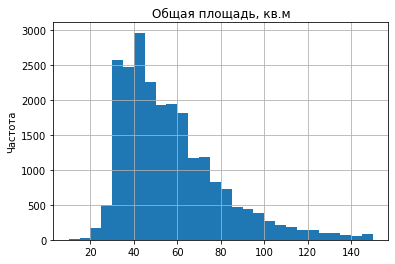

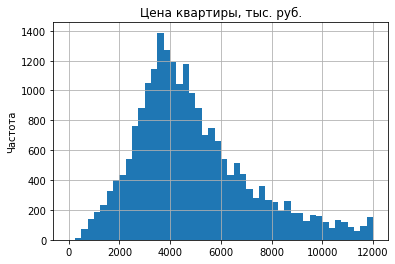

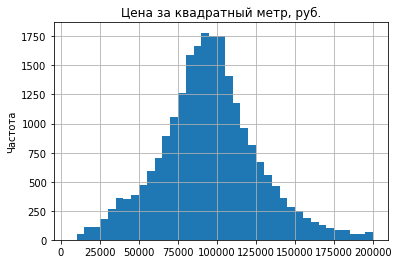

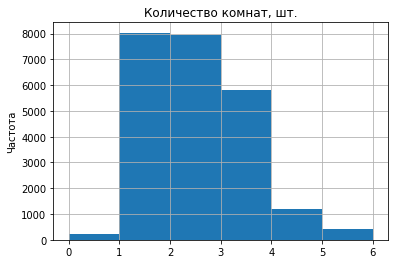

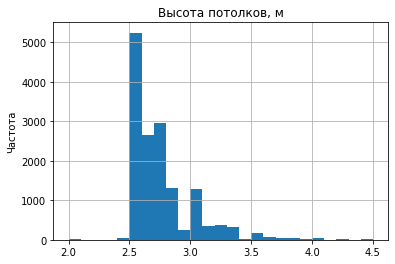

In [61]:
cols_for_viz = {'total_area' : ['Общая площадь, кв.м', (10, 150), 28], 
                'last_price' : ['Цена квартиры, тыс. руб.', (0, 12000), 48], 
                'price_for_m' : ['Цена за квадратный метр, руб.', (5000, 200000), 39], 
                'rooms' : ['Количество комнат, шт.', (0, 6), 6],
                'ceiling_height' : ['Высота потолков, м',(2, 4.5), 25]}


for col, name in cols_for_viz.items():
    data.plot(y=col, title=name[0], grid=True, kind='hist', legend=False, range=name[1], bins=name[2])
    print(f'{name[0]}:\nСредняя:{data[col].mean():.2f}, Медиана:{data[col].median():.2f}')
    plt.ylabel('Частота')

Общая площадь квартир.

Три четверти выборки умещаются в площадь до 70 кв.м. Минимальное значение - 12.

Для наглядной гистограммы выберем диапазон от 10 до 150 кв. м., а количество корзин - 28. 

Так каждый столбец должен отражать шаг в 5 кв. метров.

Из графика и данных выше видно, что после площади 65 кв. м. число квартир значительно падает.

При этом пик приходится на квартиры площадь от 40 до 45 кв. м.

Средняя площадь достаточно существенно превышает медиану из-за того, что в продаже есть квартиры с очень большой площадью.

Далее изучим цены на квартиры.

Медианная цена - 4.65 млн руб., при этом средняя более 6.5 млн руб. В продаже было очень много дорогих квартир.

Выберем диапазон до 24 млн руб, количество корзин - 48, так каждый столбец будет покзаывать шаг в 0.5 млн руб.

Видно, что самая плотная группа объектов распложилась в пределах 3-5 млн руб. А пик пришелся на 3.5-4 млн руб. 

Можно построить гистограмму с меньшим диапазоном, чтобы рассмотреть детали частых значений выборки.

Видно, что пик значений приходится на 3.5-3.75 млн руб.

Далее проанализируем цену за квадратный метр. Видно, что есть цена 110 руб., посмотрим, что это за данные

In [62]:
data.query('price_for_m < 5000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year,floor_category
8793,7,12,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,...,0,NaN,8.0,0.293578,0.37156,110,2,3,2019,последний


Возможно, кто-то ошибся разрядностью - должно быть, наверное, 12 млн. Однако мы не знаем точно, возможно, продавец имел в виду 120 млн. Поэтому оставим значение как есть, построим гистограмму с более высоким началом диапазона. Конец диапазона выберем 200000, 75% квартир из выборки имеют цену до 115 тыс. руб. за кв. м.

Средняя площадь превышает медиану, но не значительно. В целом это происходит из-за того, что в продаже имеются элитные квартиры, у которых цена за метр существенно выше.

Количество корзин выбрано так, чтобы отслеживать шаг в 5 тыс. рублей.

Видно, что пик значений приходится на 90-105 тыс. рублей.

Далее посмотрим на распределение комнат.

Квартир с количеством комнант более 5 не так много, поэтому ограничим гистограмму пятикомнатными квартирами.

Видно, что однокомнатных и двушек в продаже было почти одинаковое количество.

Студий все же очень мало.

Далее взглянем на распределение высоты потолков.

Пик значений приходится на потолки высотой 2.5 метра.

Кроме того, есть значительная группа квартир со странной высотой потолков.

Text(0, 0.5, 'Частота')

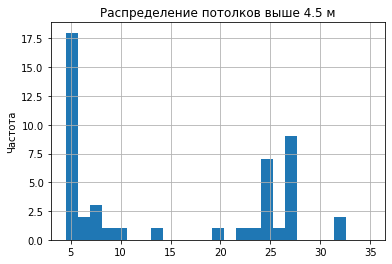

In [63]:
data['ceiling_height'].plot(kind='hist', grid=True, title = 'Распределение потолков выше 4.5 м', range = (4.5, 35), bins = 25)
plt.ylabel('Частота')

Если построить гистограмму по квартирам с высокими потолками, то мы увидим, что около 5 метров значения встречаются достаточно часто. Также есть квартиры с потолками от 5 до 10 метров. Представить такую квартиру трудно, но допустим, что эти данные имеют право на жизнь.

Видно скопление данных вокруг 25 метров, здесь, скорее всего, люди ошиблись в запятой и мы можем заменить эти значения на поделенные на 10.

In [64]:
data.query('ceiling_height > 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year,floor_category
355,17,3600,55.2,2018-07-12,2,25.0,5,32.000000,2,False,...,NaN,NaN,259.0,0.579710,0.161075,65217,3,7,2018,другой
3148,14,2900,75.0,2018-11-12,3,32.0,3,53.000000,2,NaN,...,NaN,NaN,NaN,0.706667,0.106667,38666,0,11,2018,другой
4643,0,4300,45.0,2018-02-01,2,25.0,9,30.000000,2,NaN,...,1,331,181.0,0.666667,0.155556,95555,3,2,2018,другой
4876,7,3000,25.0,2017-09-27,0,27.0,25,17.000000,17,NaN,...,NaN,NaN,28.0,0.680000,NaN,120000,2,9,2017,другой
5076,0,3850,30.5,2018-10-03,1,24.0,5,19.500000,1,True,...,1,578,7.0,0.639344,0.180328,126229,2,10,2018,первый
5246,0,2500,54.0,2017-10-13,2,27.0,5,30.000000,3,NaN,...,NaN,NaN,540.0,0.555556,0.166667,46296,4,10,2017,другой
5669,4,4400,50.0,2017-08-08,2,26.0,9,21.300000,3,NaN,...,0,NaN,267.0,0.426000,0.140000,88000,1,8,2017,другой
5807,17,8150,80.0,2019-01-09,2,27.0,36,41.000000,13,NaN,...,3,80,38.0,0.512500,0.150000,101875,2,1,2019,другой
6246,6,3300,44.4,2019-03-25,2,25.0,5,31.300000,5,NaN,...,2,73,NaN,0.704955,0.128378,74324,0,3,2019,последний
9379,5,3950,42.0,2017-03-26,3,25.0,5,30.000000,2,NaN,...,0,NaN,NaN,0.714286,0.123810,94047,6,3,2017,другой


Заменим их.

In [65]:
data.loc[(data['ceiling_height'] > 20) & (data['ceiling_height'] < 100) , 'ceiling_height'] = data['ceiling_height']/ 10

In [66]:
data.query('ceiling_height > 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year,floor_category
17496,15,6700,92.9,2019-02-19,3,20.0,17,53.200000,14,NaN,...,0,NaN,NaN,0.572659,0.129171,72120,1,2,2019,другой
22869,0,15000,25.0,2018-07-25,1,100.0,5,14.196497,5,True,...,3,30,19.0,0.567860,0.172414,600000,2,7,2018,последний


Итак, у нас остались странные значения потолков 20 метров и 100 метров.

Наверное, следует взять на себя смелость и удалить эти данные из выборки позже.

### 4.2 Исследование количества времени для продажи квартиры

На этом этапе изучим время продажи квартиры. Поскольку мы не знаем точную дату продажи, то придется считать, что продажа наступила в момент снятия объявления.

In [67]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное время продажи: 95.0
Среднее время продажи: 180.9


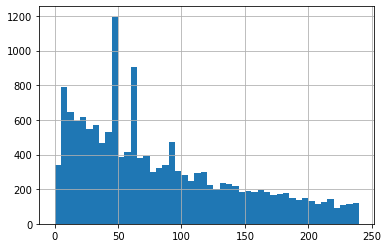

In [68]:
print(f"Медианное время продажи: {data['days_exposition'].median():.1f}")
print(f"Среднее время продажи: {data['days_exposition'].mean():.1f}")
data['days_exposition'].hist(range = (0, 240), bins = 48)

Медианное значение - 95 дней.

При этом среднее значение продажи- почти 181 день. То есть на среднее значение влияют квартиры, находящиеся в продаже очень долгое время.

Глядя на гистограмму и описательную статистику, можно сделать вывод о том, что быстрая продажа - это когда квартира была продана за 45 и менее дней - это первый квартиль.

По этой логике, долгая продажа - это значения выборки из четвертого квартиля, то есть, когда квартира была в продаже более 240 дней.

Сделаем срез таких квартир и попробуем понять, почему они продавались долго.

In [69]:
long_sale = data.query('days_exposition > 240')
long_sale.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year
count,4939.000000,4939.000000,4939.000000,4939.000000,3288.000000,4925.000000,4939.000000,4939.000000,4917.000000,4939.000000,...,1796.000000,3845.000000,2054.000000,4939.000000,4939.000000,4917.000000,4.939000e+03,4939.000000,4939.000000,4939.000000
mean,9.392387,7594.990079,66.550334,2.224134,2.784860,10.284873,38.365328,5.672201,11.195678,0.549706,...,499.312918,0.860078,487.470302,494.389957,0.564159,0.183236,1.009613e+05,2.514072,6.382466,2016.346021
std,5.554793,12563.997158,41.096780,1.163165,0.397531,6.556840,26.427943,4.833231,6.513140,0.935825,...,371.969433,0.993046,278.838229,243.230556,0.101866,0.071746,5.501598e+04,1.751801,3.505955,1.017232
min,0.000000,470.000000,13.000000,0.000000,1.200000,1.000000,3.000000,1.000000,2.300000,0.000000,...,7.000000,0.000000,13.000000,241.000000,0.021583,0.029240,1.056100e+04,0.000000,1.000000,2014.000000
25%,5.000000,3500.000000,42.000000,1.000000,2.550000,5.000000,19.600000,2.000000,7.500000,0.000000,...,280.000000,0.000000,259.250000,315.000000,0.490908,0.128571,7.525600e+04,1.000000,3.000000,2016.000000
50%,9.000000,4950.000000,56.000000,2.000000,2.700000,9.000000,32.000000,4.000000,9.800000,0.000000,...,447.000000,1.000000,456.500000,416.000000,0.570825,0.166667,9.345200e+04,2.000000,6.000000,2016.000000
75%,13.000000,7684.000000,77.905000,3.000000,2.900000,14.000000,46.350000,8.000000,12.500000,1.000000,...,620.000000,1.000000,692.000000,593.000000,0.636364,0.230678,1.143870e+05,4.000000,10.000000,2017.000000
max,28.000000,401300.000000,507.000000,16.000000,14.000000,35.000000,329.870130,27.000000,93.200000,5.000000,...,2888.000000,3.000000,1341.000000,1580.000000,0.885852,0.615385,1.000748e+06,6.000000,12.000000,2018.000000


### Вывод

Итак, видно, что в срезе квартир с долгой продажей медиана и средняя по общей площади 56 и 66.6 кв. м., что превышает в среднем значения по всему датасету. То есть квартиры с повышенной площадью продаются медленнее.

Обычно продажа занимает от 45 до 232 дней. До 45 дней и свыше 8 месяцев - можно считать быструю и медленную продажу соответственно.


### 4.3 Редкие и выбивающиеся значения

Попробуем устранить редкие и выбивающиеся значения. Обратимся к потолкам.

In [70]:
data.query('ceiling_height >= 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year,floor_category
3474,3,1400,30.0,2018-03-16,1,8.0,5,15.300000,2,False,...,NaN,NaN,125.0,0.510000,0.243333,46666,4,3,2018,другой
5863,20,5650,45.0,2018-08-15,1,8.3,16,19.300000,14,NaN,...,1,613,14.0,0.428889,0.184444,125555,2,8,2018,другой
15061,19,5600,56.4,2018-05-11,2,14.0,14,32.400000,5,NaN,...,0,NaN,315.0,0.574468,0.161348,99290,4,5,2018,другой
15743,14,5600,67.0,2016-11-11,3,8.0,16,41.000000,1,NaN,...,0,NaN,474.0,0.611940,0.119403,83582,4,11,2016,первый
17442,0,5350,54.0,2015-06-16,2,8.0,5,29.000000,2,NaN,...,0,NaN,469.0,0.537037,0.161075,99074,1,6,2015,другой
17496,15,6700,92.9,2019-02-19,3,20.0,17,53.200000,14,NaN,...,0,NaN,NaN,0.572659,0.129171,72120,1,2,2019,другой
22309,20,5300,45.0,2017-09-30,1,10.3,16,15.500000,15,False,...,2,450,136.0,0.344444,0.247839,117777,5,9,2017,другой
22869,0,15000,25.0,2018-07-25,1,100.0,5,14.196497,5,True,...,3,30,19.0,0.567860,0.172414,600000,2,7,2018,последний


Заметно, что все эти квартиры с высокими потолками - сами по себе маленькие и почти все достаточно бюджетные, то есть, их нельзя даже теоретически отнести к элитной недвижимости, у которой интуитивно высота потолков больше. Значит, произошла ошибка при заполнении.

Удалим эти данные.

In [71]:
data = data.drop(data.loc[data['ceiling_height'] >= 8].index).reset_index(drop=True)

Далее удалим квартиру с неадекватно низкой ценой и возможной ошибкой в разрядности.

In [72]:
data.query('price_for_m < 5000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year,floor_category
8791,7,12,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,...,0,NaN,8.0,0.293578,0.37156,110,2,3,2019,последний


In [73]:
data = data.drop(data.loc[data['price_for_m'] < 5000].index).reset_index(drop=True)

In [74]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year,floor_category
23685,9,9700,133.81,2017-03-21,3,3.7,5,73.300000,3,NaN,...,3,381,NaN,0.547792,0.103356,72490,1,3,2017,другой
23686,14,3100,59.00,2018-01-15,3,NaN,5,38.000000,4,NaN,...,NaN,NaN,45.0,0.644068,0.144068,52542,0,1,2018,другой
23687,18,2500,56.70,2018-02-11,2,NaN,3,29.700000,1,NaN,...,NaN,NaN,NaN,0.523810,0.161075,44091,6,2,2018,первый
23688,13,11475,76.75,2017-03-28,2,3.0,17,44.899452,12,False,...,3,196,602.0,0.585009,0.303583,149511,1,3,2017,другой
23689,4,1350,32.30,2017-07-21,1,2.5,5,12.300000,1,NaN,...,NaN,NaN,NaN,0.380805,0.278638,41795,4,7,2017,первый


Построим диаграммы размаха для ранее рассмотренных 5 параметров.

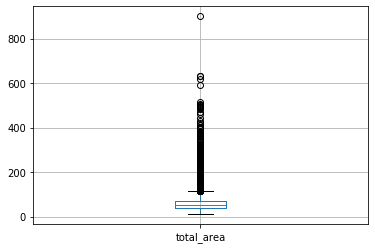

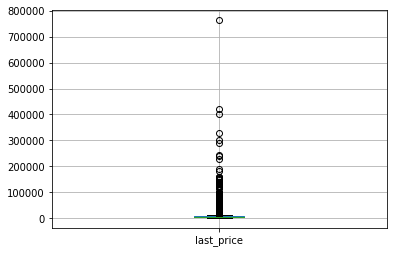

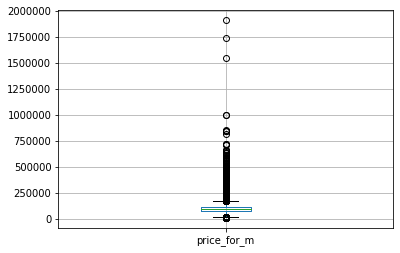

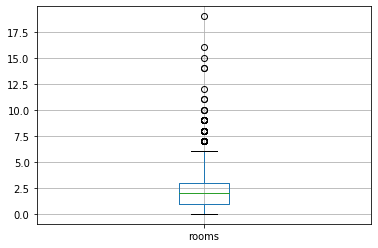

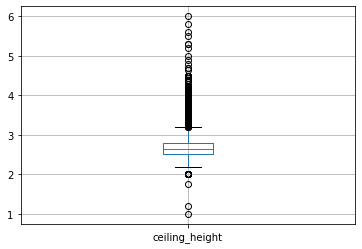

In [75]:
for column in ['total_area', 'last_price','price_for_m', 'rooms','ceiling_height']:
    plt.subplots(1)
    data.boxplot(column)

Проанализировав графики характерных разбросов, нами было принято решение избавиться от следующих значений:

Квартир, стоимостью выше 200 млн руб., так ка за этим порогом лежит считанное число объектов.

Квартир со стоимостью квадратного метра выше 1.5 млн руб.

Квартир с потолками ниже 2.4 м.

Квартир с площадью выше 580 кв. м.

In [76]:
data = data.drop(data.loc[data['last_price'] > 200000].index).reset_index(drop=True)
data = data.drop(data.loc[data['price_for_m'] > 1500000].index).reset_index(drop=True)
data = data.drop(data.loc[data['ceiling_height'] < 2.4].index).reset_index(drop=True)
data = data.drop(data.loc[data['total_area'] > 580].index).reset_index(drop=True)

In [77]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year,floor_category
23649,9,9700,133.81,2017-03-21,3,3.7,5,73.300000,3,NaN,...,3,381,NaN,0.547792,0.103356,72490,1,3,2017,другой
23650,14,3100,59.00,2018-01-15,3,NaN,5,38.000000,4,NaN,...,NaN,NaN,45.0,0.644068,0.144068,52542,0,1,2018,другой
23651,18,2500,56.70,2018-02-11,2,NaN,3,29.700000,1,NaN,...,NaN,NaN,NaN,0.523810,0.161075,44091,6,2,2018,первый
23652,13,11475,76.75,2017-03-28,2,3.0,17,44.899452,12,False,...,3,196,602.0,0.585009,0.303583,149511,1,3,2017,другой
23653,4,1350,32.30,2017-07-21,1,2.5,5,12.300000,1,NaN,...,NaN,NaN,NaN,0.380805,0.278638,41795,4,7,2017,первый


### Вывод

Итак, нами было удалено 45 строчек с редкими и выбивающимися значениями.

### 4.4 Исследование факторов, влияющих на стоимость квартиры 

На этом этапе исследуем факторы, влияющие на цену квартиры.

Для начала отберем столбцы со стоимостью квартиры, плошадью, комнатами и расстоянием до центра и сделаем отдельный датафрейм

In [78]:
area_room_center = data[['last_price','total_area', 'rooms', 'cityCenters_nearest']]
                                

In [79]:
area_room_center.head()

,last_price,total_area,rooms,cityCenters_nearest
0,13000,108.0,3,16028
1,3350,40.4,1,18603
2,5196,56.0,2,13933
3,64900,159.0,3,6800
4,10000,100.0,2,8098


Далее вызовем для этой таблицы матрицу корреляции.

In [80]:
area_room_center.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.733390,0.433113,-0.269305
total_area,0.733390,1.000000,0.764044,-0.235355
rooms,0.433113,0.764044,1.000000,-0.183640
cityCenters_nearest,-0.269305,-0.235355,-0.183640,1.000000


Итак, связь между стоимостью квартиры и общей площадью положительная, и довольно сильная.

Количество комнат влияет на стоимость квартиры относительно слабо.

Связь между расстоянием до центра и ценой - тоже достаточно слабая, зато обратная. То есть, чем ближе к центру, тем выше цена.

Далее проанализируем зависимость цены от того, на каком этаже находится квартира.

Для этого построим сводную таблицу, где строками выступят категории этажей. В качестве функции выберем медиану.

In [81]:
floor_price = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc='median')
floor_price

,last_price
floor_category,
другой,4850
первый,3900
последний,4300


Text(0.5, 0, 'Категория этажа')

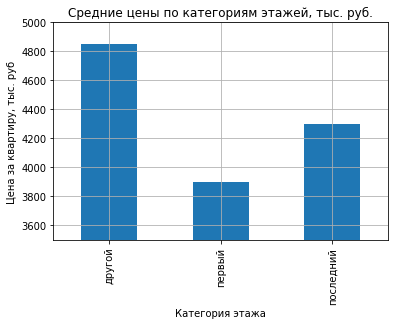

In [82]:
floor_price_graph = floor_price.plot(kind='bar', grid=True, title='Средние цены по категориям этажей, тыс. руб.', legend=False)
plt.ylim(3500, 5000)
plt.ylabel('Цена за квартиру, тыс. руб')
plt.xlabel('Категория этажа')

Как и следовало ожидать, самые выоские цены на квартиры не на первом и не на последнем этаже.

А цены на последнем выше, чем на первом. Вроде бы все логично.

Проанализиурем зависимость от дня недели размещения объявления. Построим сводную таблицу с группировкой по дня недели.

In [83]:
day_price = data.pivot_table(index = 'day_of_week', values = 'last_price', aggfunc='median')
day_price

,last_price
day_of_week,
0,4650.0
1,4714.5
2,4700.0
3,4650.0
4,4580.0
5,4550.0
6,4550.0


Text(0.5, 0, 'День недели')

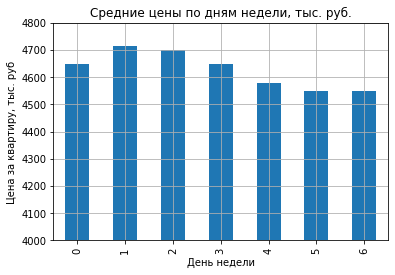

In [84]:
day_price_graph = day_price.plot(kind='bar', grid=True, title='Средние цены по дням недели, тыс. руб.', legend=False)
plt.ylim(4000, 4800)
plt.ylabel('Цена за квартиру, тыс. руб')
plt.xlabel('День недели')

В целом все значения относительно ровные. Но обращает на себя внимание, что по выходным люди склонны занижать цену на квартиру. А самые высокие оценки получаются во вторник и среду.

Проведем подобные операции для месяца и года.

In [85]:
month_price = data.pivot_table(index = 'month', values = 'last_price', aggfunc='median')
month_price

,last_price
month,
1,4600
2,4650
3,4650
4,4800
5,4530
6,4400
7,4650
8,4570
9,4700


Text(0.5, 0, 'Месяц')

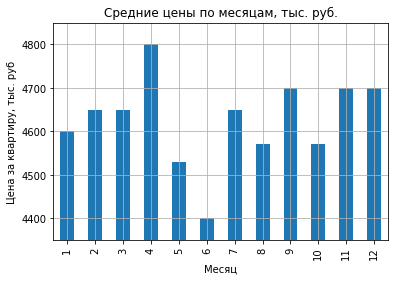

In [86]:
month_price_graph = month_price.plot(kind='bar', grid=True, title='Средние цены по месяцам, тыс. руб.', legend=False)
plt.ylim(4350, 4850)
plt.ylabel('Цена за квартиру, тыс. руб')
plt.xlabel('Месяц')

Самые высокие цены встречаются в апреле, а самые низкие - в июне.

In [87]:
year_price = data.pivot_table(index = 'year', values = 'last_price', aggfunc='median')
year_price

,last_price
year,
2014,7700
2015,5350
2016,4550
2017,4500
2018,4550
2019,5050


Text(0.5, 0, 'Год')

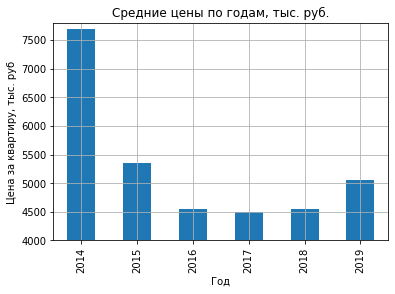

In [88]:
year_price_graph = year_price.plot(kind='bar', grid=True, title='Средние цены по годам, тыс. руб.', legend=False)
plt.ylim(4000, 7800)
plt.ylabel('Цена за квартиру, тыс. руб')
plt.xlabel('Год')

### Вывод 

Самые высокие цены по годам наблюдались в 2014, а самые низкие в 2017. Но это может быть связано со структурным сдвигом, когда в последующие годы на рынок поступило большое количество бюджетных квартир.

Итак, на стоимость квартиры значительно влияет общая площадь. Достаточно слабо, но разнонаправленно -  влияют расстояние до центра и количество комнат. Чем ближе к центру - тем выше цены.

Квартиры не на первом и не на последнем этаже - с самыми высокими ценами за метр.

По выходным люди в объявлениях склонны более скромно оценивать свою квартиру.

Наиболее высоко люди оценивают свои жилища в апреле, а ниже всего - в июне.

### 4.5 Анализ десяти населенных пунктов с наибольшим числом объявлений

Итак, отберем населенные пункты, в которых люди больше всего размещали объявления.
Создадим словарь.

In [89]:
locations = data['locality_name'].value_counts()
top_10_locations = locations[0:10]
top_10_locations = dict(top_10_locations)
top_10_locations

{'Санкт-Петербург': 15697,
 'поселок Мурино': 556,
 'поселок Шушары': 440,
 'Всеволожск': 397,
 'Пушкин': 369,
 'Колпино': 338,
 'поселок Парголово': 327,
 'Гатчина': 307,
 'деревня Кудрово': 299,
 'Выборг': 235}

Далее создадим новый датафрейм, который заполним по ключам словаря top_10_locations

In [90]:
top_10_locations_data = data.query('locality_name in @top_10_locations')

Создадим сводную таблицу, сгруппируем по населенному пункту, получим средние значения по цене за метр.

In [91]:
top_10_locations_price = (
                                top_10_locations_data
                                .pivot_table(index='locality_name', values='price_for_m')
                                .sort_values('price_for_m',ascending=False))


In [92]:
top_10_locations_price

,price_for_m
locality_name,
Санкт-Петербург,114314.288144
Пушкин,103125.252033
деревня Кудрово,92472.501672
поселок Парголово,90175.388379
поселок Мурино,85680.735612
поселок Шушары,78676.829545
Колпино,75423.970414
Гатчина,68745.677524
Всеволожск,68718.267003


### Вывод 

Населенный пункт с самой высокой ценой за метр - Санкт-Петербург, затем Пушкин, замыкает тройку - Кудрово. Самая дешевая недвижимость - в Выборге.

### 4.6 Анализ изменения цены по степени удалённости от центра

Проанализируем, как изменяются цены по удалению от центра города Санкт-Петербурга.

Добавим столбец, выражающий расстояние от в км до центра от дома.

In [93]:
data['to_center_km'] = (data['cityCenters_nearest'] / 1000).round()

In [94]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_to_total_area,kitchen_to_total_area,price_for_m,day_of_week,month,year,floor_category,to_center_km
0,20,13000,108.0,2019-03-07,3,2.70,16,51.000,8,False,...,755,NaN,0.472222,0.231481,120370,3,3,2019,другой,16.0
1,7,3350,40.4,2018-12-04,1,NaN,11,18.600,1,NaN,...,NaN,81.0,0.460396,0.272277,82920,1,12,2018,первый,19.0
2,10,5196,56.0,2015-08-20,2,NaN,5,34.300,4,NaN,...,574,558.0,0.612500,0.148214,92785,3,8,2015,другой,14.0
3,0,64900,159.0,2015-07-24,3,3.00,14,100.435,9,NaN,...,234,424.0,0.631667,0.128571,408176,4,7,2015,другой,7.0
4,2,10000,100.0,2018-06-19,2,3.03,14,32.000,13,NaN,...,48,121.0,0.320000,0.410000,100000,1,6,2018,другой,8.0


Сделаем сводную таблицу с группировкой по километрам отдаления.

In [95]:
spb_data = data.query('locality_name == "Санкт-Петербург"')

In [96]:
center_km_prices = spb_data.pivot_table(index='to_center_km', values='last_price')
center_km_prices

,last_price
to_center_km,
0.0,31449.074074
1.0,18138.172775
2.0,16547.181230
3.0,11126.568571
4.0,12214.705370
5.0,13374.344639
6.0,14966.157212
7.0,14775.123810
8.0,9259.725126


Построим график на ее основе.

Text(0.5, 0, 'Расстояние до центра, км')

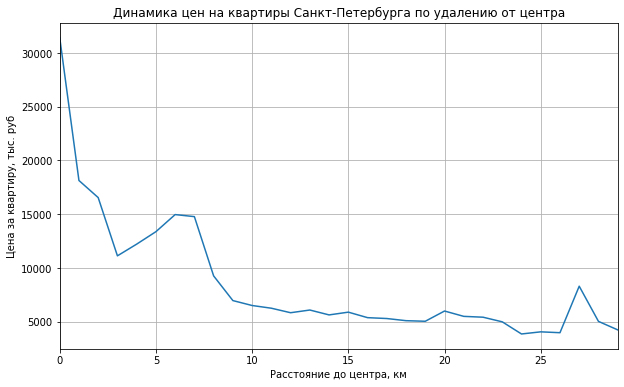

In [97]:
center_km_prices.plot(grid=True, figsize = (10, 6), legend=False, title ='Динамика цен на квартиры Санкт-Петербурга по удалению от центра' )
plt.ylabel('Цена за квартиру, тыс. руб')
plt.xlabel('Расстояние до центра, км')


### Вывод 

Исходя из данных таблицы и графика, границу центральной зоны следует определить в 8 км.

После этого расстояния цена на квартиры меняется уже более плавно.


### 4.7 Сравнение выводов по квартирам в центре и общих выводов по всему городу

Проанализируем квартиры, попавшие в центральную зону. Создадим отдельный датафрейм.

In [98]:
data_center = data.query('to_center_km <= 8 and locality_name == "Санкт-Петербург"')

In [99]:
data_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4110 entries, 3 to 23649
Data columns (total 30 columns):
total_images             4110 non-null int64
last_price               4110 non-null int64
total_area               4110 non-null float64
first_day_exposition     4110 non-null datetime64[ns]
rooms                    4110 non-null int64
ceiling_height           2961 non-null float64
floors_total             4102 non-null Int64
living_area              4110 non-null float64
floor                    4110 non-null int64
is_apartment             760 non-null object
studio                   4110 non-null bool
open_plan                4110 non-null bool
kitchen_area             4086 non-null float64
balcony                  4110 non-null int64
locality_name            4110 non-null object
airports_nearest         4104 non-null Int64
cityCenters_nearest      4110 non-null Int64
parks_around3000         4110 non-null Int64
parks_nearest            2692 non-null Int64
ponds_around3000     

В него попало 4110 квартир в центральной зоне Санкт-Петербурга.

Начнем изучать следующие параметры - площадь, цена за квартиру, цена за метр,.

In [100]:
data_center[['total_area', 'last_price','price_for_m', 'rooms','ceiling_height']].describe()

,total_area,last_price,price_for_m,rooms,ceiling_height
count,4110.000000,4110.000000,4110.000000,4110.000000,2961.000000
mean,89.222479,13355.636253,140364.263260,2.746229,3.049558
std,54.018567,15373.702251,73906.093817,1.398667,0.371091
min,12.000000,1600.000000,15345.000000,0.000000,2.400000
25%,55.000000,6450.000000,100000.000000,2.000000,2.800000
50%,76.000000,8938.000000,123470.000000,3.000000,3.000000
75%,106.650000,13800.000000,153330.750000,3.000000,3.200000
max,517.000000,190870.000000,995983.000000,19.000000,6.000000


Создадим цикл для построения графиков по параметрам квартир из центра.

А также продублируем меры центральной статистики по всем параметрам.

Общая площадь квартир в центре СПб, кв.м:
Средняя:89.22, Медиана:76.00

Цена квартиры в центре СПб, тыс. руб.:
Средняя:13355.64, Медиана:8938.00

Цена за квадратный метр в центре СПб, руб.:
Средняя:140364.26, Медиана:123470.00

Количество комнат по квартирам в центре СПб, шт.:
Средняя:2.75, Медиана:3.00

Высота потолков квартир в центре СПб, м:
Средняя:3.05, Медиана:3.00



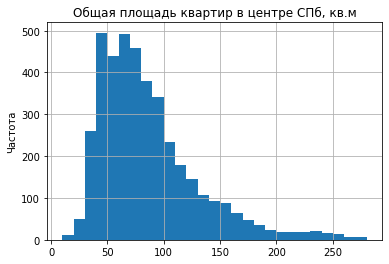

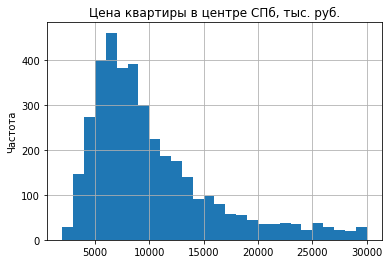

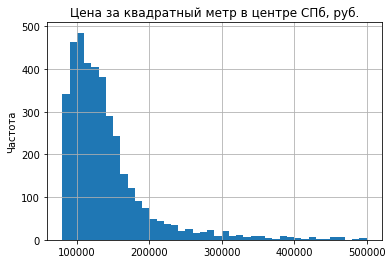

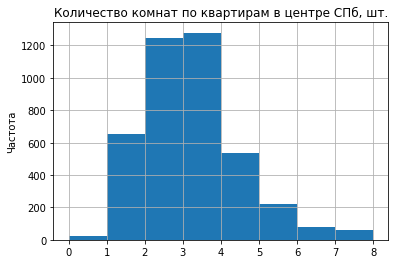

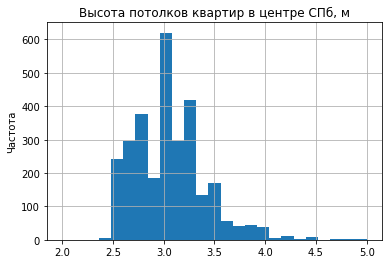

In [101]:
cols_for_viz_center = {'total_area' : ['Общая площадь квартир в центре СПб, кв.м', (10, 280), 27], 
                'last_price' : ['Цена квартиры в центре СПб, тыс. руб.', (2000, 30000), 28], 
                'price_for_m' : ['Цена за квадратный метр в центре СПб, руб.', (80000, 500000), 42], 
                'rooms' : ['Количество комнат по квартирам в центре СПб, шт.', (0, 8), 8],
                'ceiling_height' : ['Высота потолков квартир в центре СПб, м',(2, 5), 25]}


for col, name in cols_for_viz_center.items():
    data_center.plot(y=col, title=name[0], grid=True, kind='hist', legend=False, range=name[1], bins=name[2])
    print(f'{name[0]}:\nСредняя:{data_center[col].mean():.2f}, Медиана:{data_center[col].median():.2f}\n')
    plt.ylabel('Частота')

Начнем с площади квартиры.

Медианные и средние значения существенно выше, чем в целом по большому по датасету.

То же касается мер центральной статистики стоимости квартиры - существенно выше.

Средняя стоимость метра также гораздо выше. При этом также большая разница между средним и медианой.

В центре превалируют продажи двухкомнатных и трехкомнатных квартир. Что отличается от распределения по комнатам в целом по выборке.

Потолки также выше.

Построим матрицу корреляции.

In [102]:
data_center_price_corr = data_center[['last_price','total_area', 'rooms', 'cityCenters_nearest']]
data_center_price_corr.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.701697,0.389345,-0.099372
total_area,0.701697,1.000000,0.746006,-0.155186
rooms,0.389345,0.746006,1.000000,-0.212914
cityCenters_nearest,-0.099372,-0.155186,-0.212914,1.000000


Видно, что здесь влияние площади на цену квартиры немного ниже.

Также более слабая связь с количеством комнат и расстоянием до центра.

Проанализиуем связь стоимости квартиры с этажом.

In [103]:
floor_price_center = data_center.pivot_table(index = 'floor_category', values = 'last_price', aggfunc='median')
floor_price_center

,last_price
floor_category,
другой,9300
первый,6470
последний,9000


Text(0.5, 0, 'Категория этажа')

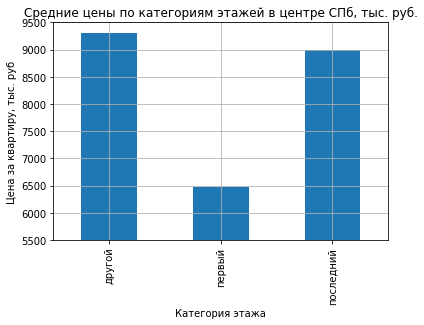

In [104]:
floor_price_center_graph = floor_price_center.plot(kind='bar', grid=True, title='Средние цены по категориям этажей в центре СПб, тыс. руб.', legend=False)
plt.ylim(5500, 9500)
plt.ylabel('Цена за квартиру, тыс. руб')
plt.xlabel('Категория этажа')

Самые дорогие квартиры не на первом и на последнем. А стоимостб квартир на первом существенно уступает остальным категориям.

In [105]:
day_price_center = data_center.pivot_table(index = 'day_of_week', values = 'last_price', aggfunc='median')
day_price_center

,last_price
day_of_week,
0,9200.0
1,8755.0
2,8920.0
3,9000.0
4,8895.0
5,8497.5
6,9200.0


Text(0.5, 0, 'День недели')

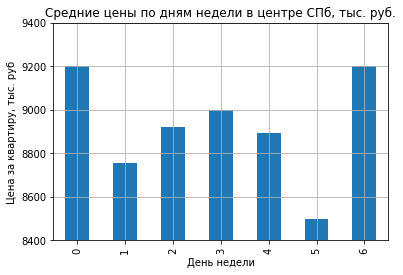

In [106]:
day_price_center_graph = day_price_center.plot(kind='bar', grid=True, title='Средние цены по дням недели в центре СПб, тыс. руб.', legend=False)
plt.ylim(8400, 9400)
plt.ylabel('Цена за квартиру, тыс. руб')
plt.xlabel('День недели')

В центре города самые дешевые квартиры поступают в продажу по вторникам и субботам.

In [107]:
month_price_center = data_center.pivot_table(index = 'month', values = 'last_price', aggfunc='median')
month_price_center

,last_price
month,
1,9200
2,9009
3,9060
4,8700
5,8900
6,8675
7,9000
8,8900
9,9400


Text(0.5, 0, 'Месяц')

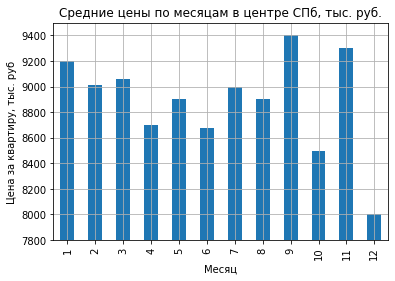

In [108]:
month_price_center_graph = month_price_center.plot(kind='bar', grid=True, title='Средние цены по месяцам в центре СПб, тыс. руб.', legend=False)
plt.ylim(7800, 9500)
plt.ylabel('Цена за квартиру, тыс. руб')
plt.xlabel('Месяц')

В декабре квартиры, поступающие в продажу, имеют наиболее низкую стоимость, а в сентябре и ноябре - высокую.

In [109]:
year_price_center = data_center.pivot_table(index = 'year', values = 'last_price', aggfunc='median')
year_price_center

,last_price
year,
2014,17300
2015,9962
2016,9400
2017,8890
2018,8500
2019,9000


Text(0.5, 0, 'Год')

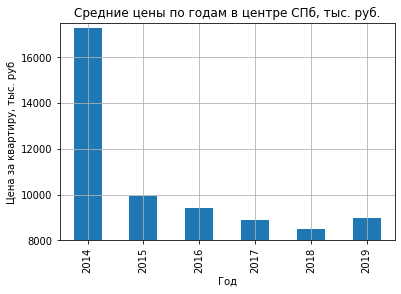

In [110]:
year_price_center_graph = year_price_center.plot(kind='bar', grid=True, title='Средние цены по годам в центре СПб, тыс. руб.', legend=False)
plt.ylim(8000, 17500)
plt.ylabel('Цена за квартиру, тыс. руб')
plt.xlabel('Год')

В 2014 году стоимость поступивших квартир был очень высокой. В 2015 существенно снизилась. В последующие годы колебалась в диапазоне 8.5 - 10 млн руб.

### Вывод 

В целом квартиры в центре по параметрам (потолки, площадь) отличаются от квартир по общей выборке.

Но на стоимость квартиры влияют достаточно симметрично общая площадь и количество комнат. Хотя в случае с квартирами в центре эта связь слабее.

Различаются колебания по стоимости квартир по дням недели - в центре самые "дешевые" дни - вторник и суббота. 

По месяцам данные также сильно расходятся.

### Шаг 5. Общий вывод

Итак, нами был проанализирован архив объявлений  продаже квартир в Санкт-Петербурге.

Были изучены такие параметры, как площадь, стоимость квартиры, число комнат, высота потолков.

Было установлено, что распространенными квартирами в продаже являются одно- и двухкомнатные.

Медианное значение по площади квартиры по всей выборке - 52 кв. м.

На стоимость квартиры сильнее всего влияет общая площадь квартиры. Коэффициент корреляции Пирсона около 0.73.

Более слабое влияние оказывает количество комнат, еще более слабое (и в обратном направлении) оказывает влияние расстояния до центра.

Также было установлено, что нахождение квартиры не на первом и не на последнем этаже положительно влияет на ее стоимость.

А также установлено то, что по выходным в объявлениях встречаются более низкие цены на квартиры, чем в будние дни.

Нами было установлен список из 10 населенных пунктов, в которых болльше всего продавалось квартир. 

В них была проанализирована цена за метр и установлено, что в среднем самой высокое значение кв. метра в Санкт-Петербурге, а самое низкое - в Выборге.

Также, исходя из расстояния в км до центра нами был выделен сегмент недвижимости в центе Санкт-Петербурга. Здесь в выделении этого сегмента мы ориентировались на выход графика цен на квартиры на плато, и получилась граница в 8 км. 


В целом для недвижимости в центре СПб характерно сходное влияние факторов на стоимость квартиры, что и для всей выборки.

Сильнее всего на стоимость квартир в центре влияет плошадь, незначительно - количество комнат. Расстояние до центра имеет более слабое влияние.

Также нет сходства в календарном влиянии на цену.